# FCS time-series dataset released by WFP 

The complete version of the data released by WFP regarding the **Food Consumption Score (FCS)**. In this notebook I analyze two versions of data released by WFP regarding this indicator. The *second version* (it will be the first version to be analyzed in this notebook) is a data collection with a daily granularity, while the *first version* (also named *demo version*) of the data is a data collection with a monthly granularity. In this notebook, the first version will be used only with the fcs data of the Yemen country.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
from scipy.interpolate import splrep, splev
from plotly_dataframe import plot, plot_comparison
from plot_map import draw_admin
import pandas as pd
import numpy as np
import ntpath
import glob

In [2]:
# Define the path where the results arising from this analysis will be saved.
path_to_save_data = "./time-series/"

# 2° version - day granularity - YEM, NGA, SYR, BFA

In this version the fcs data of four countries are provided: *Yemen* (YEM), *Nigeria* (NGA), *Syria* (SYR) and *Burkina Faso* (BFA).

In [3]:
# Read the data released by wfp regarding the FCS indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

In [4]:
print("The data released by wfp:")
df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

The data released by wfp:


,SvyDate,Date,Dmgrph,DmgrphCode,Mean_crrnt,Pop,PopNmbr,Country
0,2019-7-15_2019-9-8,2019-09-08,BOUCLE-DU-MOUHOUN,900712.0,30.921705,1976217,611079,Burkina Faso
1,2019-7-15_2019-9-8,2019-09-08,CASCADES,900713.0,22.732405,822445,186961,Burkina Faso
2,2019-7-15_2019-9-8,2019-09-08,CENTRE,900714.0,22.093784,2854356,630635,Burkina Faso
3,2019-7-15_2019-9-8,2019-09-08,CENTRE-EST,900715.0,44.186047,2854356,1261227,Burkina Faso
4,2019-7-15_2019-9-8,2019-09-08,CENTRE-NORD,900716.0,61.948843,1687858,1045608,Burkina Faso


### Brief items description

- *SvyDate*: reference period of the data collection.
- *Date*: reference date (i.e. the end of the reference period). 
- *Dmgrph*: administrative area name.
- *DmgrphCode*: a code for identyfing the adminstrata.
- *Mean_crrnt*: % of people with poor and borderline FCS.
- *Pop*: area population size.
- *PopNmbr*: number of people with poor and borderline FCS (i.e. Mean_crrnt * Pop).

In [5]:
# Check if the dataframe contains NaN values.
print("Check if the dataframe contains NaN values:")
df.isnull().sum()

Check if the dataframe contains NaN values:


SvyDate          0
Date             0
Dmgrph           0
DmgrphCode    1620
Mean_crrnt       0
Pop              0
PopNmbr          0
Country          0
dtype: int64

In [6]:
# Let's delete the item 'DmgrphCode' because it is not of interest.
df.drop(["DmgrphCode"], axis = 1, inplace = True) 

In [7]:
# Rename some columns.
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "Metric"}, inplace = True)

### Country item

In [8]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


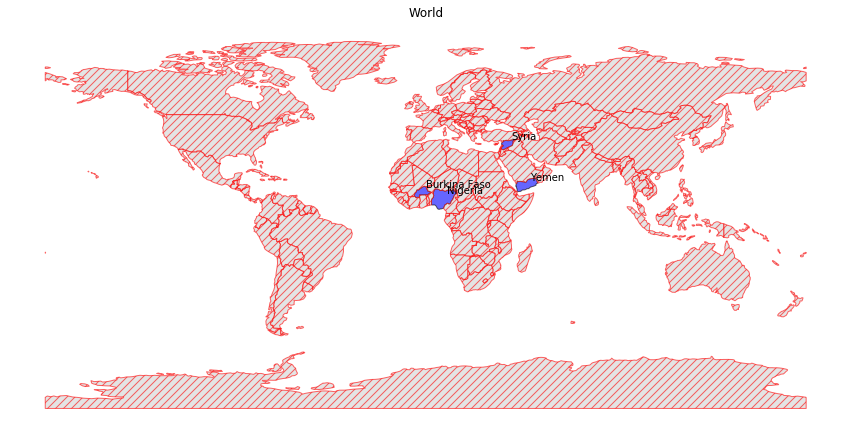

In [11]:
draw_admin("World", df.Country.unique(), figsize = (15, 9), annotation = True, annotation_selected = True)

### AdminStrata item

In [9]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The FCS dataframe has the values of all the 22 governorates.

In [10]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit',
       'Amanat Al Asimah', 'Amran', 'Dhamar', 'Hadramaut', 'Hajjah',
       'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah',
       'Taizz', 'Aden', 'Al Bayda', "Al Dhale'e", 'Socotra'], dtype=object)

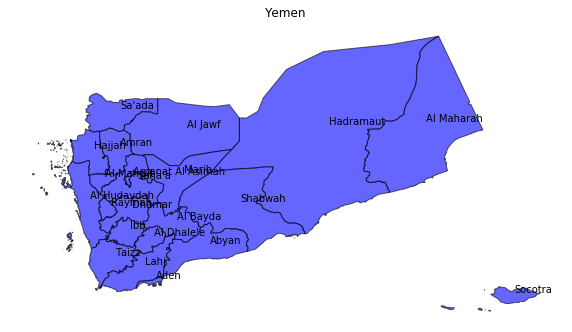

In [11]:
draw_admin("Yemen", AdminStratas["Yemen"], figsize = (10, 7), annotation = True)

- **Nigeria**: Nigeria is divided into 36 states. It also includes *The Federal Capital Territory* that is not a state and it is under the direct control of the federal government. The AdminStrata items of the FCS dataframe cover 3 states (Adamawa, Borno and Yobe) and each of these state is diveded into three parts: North, South, Central.

In [12]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(9,)


array(['Adamawa Central', 'Adamawa North', 'Adamawa South',
       'Borno Central', 'Borno North', 'Borno South', 'Yobe East',
       'Yobe North', 'Yobe South'], dtype=object)

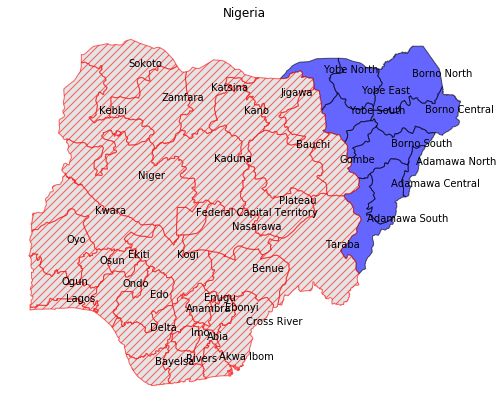

In [13]:
draw_admin("Nigeria", AdminStratas["Nigeria"], figsize = (10, 7), annotation = True)

- **Syria**: the governatores of the Syria country are 14. The FCS dataframe has the values of 13 governorates (Idleb governatore not included).

In [14]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Tartous', 'Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus',
       "Dar'a", 'Hama', 'Homs', 'Lattakia', 'Rural Damascus', 'Ar-Raqqa',
       'Deir-ez-Zor', 'Quneitra'], dtype=object)

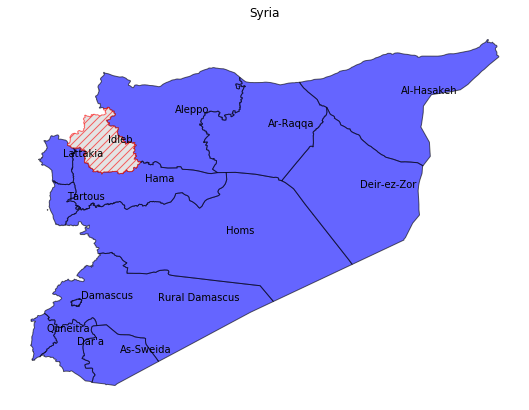

In [15]:
draw_admin("Syria", AdminStratas["Syria"], figsize = (10, 7), annotation = True)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The FCS dataframe has the values of all 13 regions.

In [16]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['BOUCLE-DU-MOUHOUN', 'CASCADES', 'CENTRE', 'CENTRE-EST',
       'CENTRE-NORD', 'CENTRE-OUEST', 'CENTRE-SUD', 'EST',
       'HAUTS-BASSINS', 'NORD', 'PLATEAU-CENTRAL', 'SAHEL', 'SUD-OUEST'],
      dtype=object)

In [17]:
# The strings of AdminStrata key for Burkina Faso country are uppercase, I change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

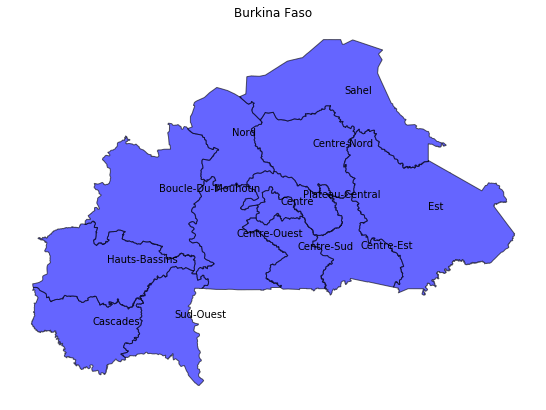

In [18]:
draw_admin("Burkina Faso", df[df["Country"] == "Burkina Faso"].AdminStrata.unique(), figsize = (10, 7), annotation = True)

In [16]:
# Check the min e max values of the Metric.
print("The min and max values of the Metric:")
print(df.Metric.min(), ",", df.Metric.max())

The min and max values of the Metric:
2.24791265253693 , 84.55928979074173


In [17]:
# Creation of an accurate datetime format (not consider the item 'SvyDate').
df.drop(["SvyDate"], axis = 1, inplace = True) 
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,Metric,Pop,PopNmbr
0,Burkina Faso,Boucle-Du-Mouhoun,2019-09-08,30.921705,1976217.0,611079.0
1,Burkina Faso,Boucle-Du-Mouhoun,2019-09-09,31.103928,1976217.0,614681.0
2,Burkina Faso,Boucle-Du-Mouhoun,2019-09-10,32.030296,1976217.0,632988.0
3,Burkina Faso,Boucle-Du-Mouhoun,2019-09-11,32.167300,1976217.0,635695.0
4,Burkina Faso,Boucle-Du-Mouhoun,2019-09-12,31.770045,1976217.0,627845.0


In [18]:
# Create a dataframe with multi index column in order to have a summary dataframe of the time-series.
df.drop(labels = ["Pop", "PopNmbr"], axis = 1, inplace = True)
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"])
df.columns = df.columns.droplevel(0)
df.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple(list(x) + ["FCS"]), df.columns)))
df.columns.rename("Country", level = 0, inplace = True)
df.columns.rename("AdminStrata", level = 1, inplace = True)
df.columns.rename("Indicator", level = 2, inplace = True)
freq = "D"
df.index.freq = freq
df.head()

Country          Burkina Faso                                         \
AdminStrata Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
Indicator                 FCS      FCS    FCS        FCS         FCS   
Datetime                                                               
2018-07-02                NaN      NaN    NaN        NaN         NaN   
2018-07-03                NaN      NaN    NaN        NaN         NaN   
2018-07-04                NaN      NaN    NaN        NaN         NaN   
2018-07-05                NaN      NaN    NaN        NaN         NaN   
2018-07-06                NaN      NaN    NaN        NaN         NaN   

Country                                                     ...      Yemen  \
AdminStrata Centre-Ouest Centre-Sud Est Hauts-Bassins Nord  ...     Hajjah   
Indicator            FCS        FCS FCS           FCS  FCS  ...        FCS   
Datetime                                                    ...              
2018-07-02           NaN        NaN NaN           NaN  NaN  ...  28.361345   
2018-07-03           NaN        NaN NaN           NaN  NaN  ...  28.805448   
2018-07-04           NaN        NaN NaN           NaN  NaN  ...  30.993706   
2018-07-05           NaN        NaN NaN           NaN  NaN  ...  32.905902   
2018-07-06           NaN        NaN NaN           NaN  NaN  ...  32.598181   

Country                                                                        \
AdminStrata        Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2018-07-02   25.036668  31.762436  32.596233  54.121774  17.676022  26.917713   
2018-07-03   27.102390  32.049499  33.333333  56.722689  17.134560  25.783476   
2018-07-04   29.844066  33.106267  36.883683  56.306306  17.454545  25.436047   
2018-07-05   29.025363  32.938828  36.897633  56.231003  17.846350  27.421759   
2018-07-06   30.692766  33.837934  36.669568  57.324841  18.463057  26.547231   

Country                                       
AdminStrata    Shabwah    Socotra      Taizz  
Indicator          FCS        FCS        FCS  
Datetime                                      
2018-07-02   16.752289  23.822825  26.563365  
2018-07-03   18.257453  23.699881  29.124005  
2018-07-04   19.083081  23.103187  29.427973  
2018-07-05   20.349533  21.596419  30.456026  
2018-07-06   21.107524  20.129084  31.012517  

[5 rows x 57 columns]

In [19]:
plot(df, title = "FCS original (2° version - daily)", yaxis = "% of people with poor and borderline FCS", 
     first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

ATTENTION: the adminstratas 'Hadramaut' and 'Socotra' of the Yemen country have the same time-series of the FCS indicator! I delete the time-series of the 'Socotra' adminstrata. 

In [19]:
df = df.drop("Socotra", axis = 1, level = 1)

In [23]:
# Now save the time-series of each country keeping as indeces the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(path_to_save_data + country + "/" + name + ".csv", index_label = False)

In [24]:
_ = df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v2-daily-original"))

## Adjusting the time-series (interpolation nan values)

In [20]:
# I get the time-series for each country without nan values in the middle and with equal start and end between adminstrata of the same country.
def interpolation(group):   
    group.columns = group.columns.droplevel()
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear", limit = 7)
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 1)
    return group

df_interpolate = df.groupby(axis = 1, level = 0).apply(interpolation)
df_interpolate.head()

Country          Burkina Faso                                         \
AdminStrata Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
Indicator                 FCS      FCS    FCS        FCS         FCS   
Datetime                                                               
2018-07-02                NaN      NaN    NaN        NaN         NaN   
2018-07-03                NaN      NaN    NaN        NaN         NaN   
2018-07-04                NaN      NaN    NaN        NaN         NaN   
2018-07-05                NaN      NaN    NaN        NaN         NaN   
2018-07-06                NaN      NaN    NaN        NaN         NaN   

Country                                                     ...      Yemen  \
AdminStrata Centre-Ouest Centre-Sud Est Hauts-Bassins Nord  ...     Hajjah   
Indicator            FCS        FCS FCS           FCS  FCS  ...        FCS   
Datetime                                                    ...              
2018-07-02           NaN        NaN NaN           NaN  NaN  ...  28.361345   
2018-07-03           NaN        NaN NaN           NaN  NaN  ...  28.805448   
2018-07-04           NaN        NaN NaN           NaN  NaN  ...  30.993706   
2018-07-05           NaN        NaN NaN           NaN  NaN  ...  32.905902   
2018-07-06           NaN        NaN NaN           NaN  NaN  ...  32.598181   

Country                                                                        \
AdminStrata        Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2018-07-02   25.036668  31.762436  32.596233  54.121774  17.676022  26.917713   
2018-07-03   27.102390  32.049499  33.333333  56.722689  17.134560  25.783476   
2018-07-04   29.844066  33.106267  36.883683  56.306306  17.454545  25.436047   
2018-07-05   29.025363  32.938828  36.897633  56.231003  17.846350  27.421759   
2018-07-06   30.692766  33.837934  36.669568  57.324841  18.463057  26.547231   

Country                                       
AdminStrata    Shabwah    Socotra      Taizz  
Indicator          FCS        FCS        FCS  
Datetime                                      
2018-07-02   16.752289  23.822825  26.563365  
2018-07-03   18.257453  23.699881  29.124005  
2018-07-04   19.083081  23.103187  29.427973  
2018-07-05   20.349533  21.596419  30.456026  
2018-07-06   21.107524  20.129084  31.012517  

[5 rows x 54 columns]

In [21]:
plot(df_interpolate, title = "FCS interpolation (2° version - daily)", yaxis = "% of people with poor and borderline FCS", 
     first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [25]:
_ = df_interpolate.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v2-daily-interpolate"))

## Fit of the time-series (smooth data)

In [25]:
def fit(group):   
    group.columns = group.columns.droplevel()
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 0)
    
    def smooth(serie):
        bspl = splrep(np.arange(0, len(serie)), serie.values, s = 500)
        bspl_y = splev(np.arange(0, len(serie)), bspl)
        return pd.Series(bspl_y, index = serie.index, name = serie.name)
    
    group_fit = group.apply(smooth)

    return group_fit

df_fit = df_interpolate.groupby(axis = 1, level = 0).apply(fit)
df_fit.dropna(axis = 0, how = "all", inplace = True)
df_fit.head()

Country          Burkina Faso                                         \
AdminStrata Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
Indicator                 FCS      FCS    FCS        FCS         FCS   
Datetime                                                               
2018-07-02                NaN      NaN    NaN        NaN         NaN   
2018-07-03                NaN      NaN    NaN        NaN         NaN   
2018-07-04                NaN      NaN    NaN        NaN         NaN   
2018-07-05                NaN      NaN    NaN        NaN         NaN   
2018-07-06                NaN      NaN    NaN        NaN         NaN   

Country                                                     ...      Yemen  \
AdminStrata Centre-Ouest Centre-Sud Est Hauts-Bassins Nord  ...  Hadramaut   
Indicator            FCS        FCS FCS           FCS  FCS  ...        FCS   
Datetime                                                    ...              
2018-07-02           NaN        NaN NaN           NaN  NaN  ...  24.399919   
2018-07-03           NaN        NaN NaN           NaN  NaN  ...  23.258033   
2018-07-04           NaN        NaN NaN           NaN  NaN  ...  22.328133   
2018-07-05           NaN        NaN NaN           NaN  NaN  ...  21.592889   
2018-07-06           NaN        NaN NaN           NaN  NaN  ...  21.034973   

Country                                                                        \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2018-07-02   28.007419  24.863115  32.017741  33.008420  54.694139  16.948502   
2018-07-03   29.833781  27.222605  32.325814  34.231691  55.408640  17.488985   
2018-07-04   31.083657  29.025828  32.631356  35.330495  56.373386  17.986721   
2018-07-05   31.843099  30.351675  32.932649  36.315678  57.384752  18.443266   
2018-07-06   32.198159  31.279039  33.227976  37.198090  58.239116  18.860173   

Country                                       
AdminStrata     Sana'a    Shabwah      Taizz  
Indicator          FCS        FCS        FCS  
Datetime                                      
2018-07-02   25.795141  16.834657  28.095998  
2018-07-03   26.206560  18.236068  28.649019  
2018-07-04   26.609465  19.328230  29.151062  
2018-07-05   27.001042  20.158842  29.604903  
2018-07-06   27.378479  20.775606  30.013316  

[5 rows x 53 columns]

In [26]:
plot_comparison(df_interpolate, df_fit, title = "Fit comparison", yaxis = "% of people with poor and borderline FCS", 
                first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country:', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yeme…

In [27]:
_ = df_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v2-daily-smooth"))

## Resampling datetime

I decide to resample data with a monthly frequency taking the end point of each month as reference of that month according to the sliding window used during the survey. 

In [28]:
# Resampling according to the survey date monthly.
mask = df.index.map(lambda x: x.is_month_end)
df_resample = df_interpolate[mask]
df_resample.head()

Country          Burkina Faso                                         \
AdminStrata Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
Indicator                 FCS      FCS    FCS        FCS         FCS   
Datetime                                                               
2018-07-31                NaN      NaN    NaN        NaN         NaN   
2018-08-31                NaN      NaN    NaN        NaN         NaN   
2018-09-30                NaN      NaN    NaN        NaN         NaN   
2018-10-31                NaN      NaN    NaN        NaN         NaN   
2018-11-30                NaN      NaN    NaN        NaN         NaN   

Country                                                     ...      Yemen  \
AdminStrata Centre-Ouest Centre-Sud Est Hauts-Bassins Nord  ...  Hadramaut   
Indicator            FCS        FCS FCS           FCS  FCS  ...        FCS   
Datetime                                                    ...              
2018-07-31           NaN        NaN NaN           NaN  NaN  ...  14.253996   
2018-08-31           NaN        NaN NaN           NaN  NaN  ...  28.609626   
2018-09-30           NaN        NaN NaN           NaN  NaN  ...  59.035445   
2018-10-31           NaN        NaN NaN           NaN  NaN  ...  47.520661   
2018-11-30           NaN        NaN NaN           NaN  NaN  ...  23.575520   

Country                                                                        \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2018-07-31   33.743784  37.550236  36.263736  50.305556  55.661578  28.973510   
2018-08-31   29.816514  36.331000  45.786937  41.186586  48.482892  24.249634   
2018-09-30   37.632904  39.449927  46.847826  50.574300  56.385870  31.546550   
2018-10-31   44.967836  49.005725  53.398213  57.506297  62.593516  35.161918   
2018-11-30   42.016317  46.035074  47.757526  54.135933  52.526300  24.191568   

Country                                       
AdminStrata     Sana'a    Shabwah      Taizz  
Indicator          FCS        FCS        FCS  
Datetime                                      
2018-07-31   27.449218  26.708984  32.501307  
2018-08-31   31.819788  31.279980  36.949861  
2018-09-30   31.140079  43.282616  36.885122  
2018-10-31   33.788443  32.284981  52.206531  
2018-11-30   37.526316  39.711023  48.678963  

[5 rows x 53 columns]

In [29]:
plot(df_resample, title = "FCS resampling (2° version - monthly)", yaxis = "% of people with poor and borderline FCS", 
     style = "lines+markers", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [30]:
_ = df_resample.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v2-monthly"))

# 1° version - month granularity - YEM

In [31]:
# Obtain the desired data from the right folder demo.
df_demo = pd.read_excel("../../../Demo/Data Sources/Food Consumption Score (FCS)/mVam_FoodConsumptionScore.xlsx")
# Select only data of the Yemen country ignoring also the adminstrata that represents the full country.
df_demo = df_demo[(df_demo.Country == "Yemen") & (df_demo.AdminStrata != "Yemen")]
df_demo.reset_index(drop = True, inplace = True)
# Adjusting some names of adminstratas in order to be equivalent to the 2° version.
df_demo.AdminStrata.replace(to_replace = {"Ad Dali": "Al Dhale'e", "Sana'a City": "Amanat Al Asimah", "Sa'dah": "Sa'ada"}, 
                            inplace = True)
df_demo.head()

,Country,Year,Month,AdminStrata,Mean,Median,Poor,Borderline,Acceptable
0,Yemen,2019.0,September,Al Dhale'e,47.04,45.50,13.84,31.59,54.57
1,Yemen,2019.0,September,Al Hudaydah,56.92,53.00,7.54,23.43,69.03
2,Yemen,2019.0,September,Hadramaut,52.30,51.36,14.16,16.79,69.05
3,Yemen,2019.0,September,Lahj,46.10,43.00,14.54,31.63,53.83
4,Yemen,2019.0,September,Sana'a,47.61,49.53,15.89,24.87,59.23


In [32]:
# Delete rows with some nan values into it.
df_demo.dropna(inplace = True)
# Adjust the temporal information.
data = pd.to_datetime(df_demo["Year"].astype(int).astype(str) + df_demo["Month"], format = "%Y%B") 
df_demo.insert(1, "Datetime", data)
df_demo.drop(["Year", "Month"], axis = 1, inplace = True)
df_demo.sort_values("Datetime", ascending = True, inplace = True) 
df_demo = df_demo.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("M").mean()).reset_index()
df_demo.reset_index(drop = True, inplace = True)

In [33]:
# Compute the metric of interest for the fcs analysis: poor + borderline
def compute_metric(poor, bord):
    metric = poor + bord
    return metric

df_demo["Metric"] = df_demo[["Poor", "Borderline"]].apply(lambda x: compute_metric(*x), axis = 1)
df_demo.drop(["Mean", "Median", "Poor", "Borderline", "Acceptable"], axis = 1, inplace = True)

In [34]:
# Create an appropriate multi-columns dataframe.
df_demo = df_demo.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"])
df_demo.columns = df_demo.columns.droplevel(0)
df_demo.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple(list(x) + ["FCS"]), df_demo.columns)))
df_demo.columns.rename("Country", level = 0, inplace = True)
df_demo.columns.rename("AdminStrata", level = 1, inplace = True)
df_demo.columns.rename("Indicator", level = 2, inplace = True)
freq = "M"
df_demo.index.freq = freq
# Making interpolation.
df_demo = df_demo.interpolate(method = "linear")
# Delete rows that still have some nan values.
df_demo.dropna(inplace = True, axis = 0)
df_demo.head()

Country       Yemen                                                            \
AdminStrata   Abyan   Aden Al Bayda Al Dhale'e Al Hudaydah Al Jawf Al Maharah   
Indicator       FCS    FCS      FCS        FCS         FCS     FCS        FCS   
Datetime                                                                        
2015-09-30   34.100  21.22    32.76      57.43       32.28   37.97      18.00   
2015-10-31   40.145  38.02    46.39      54.33       37.67   49.74      25.00   
2015-11-30   46.190  27.95    52.56      56.44       32.65   56.74      35.56   
2015-12-31   36.110  30.60    54.37      53.04       25.54   58.22      24.82   
2016-01-31   43.440  26.24    55.33      50.44       32.19   55.17      19.78   

Country                                        ...                          \
AdminStrata Al Mahwit Amanat Al Asimah  Amran  ... Hadramaut Hajjah    Ibb   
Indicator         FCS              FCS    FCS  ...       FCS    FCS    FCS   
Datetime                                       ...                           
2015-09-30      34.38            33.43  46.82  ...     27.81  52.04  48.10   
2015-10-31      34.56            36.76  45.05  ...     27.61  54.73  46.12   
2015-11-30      39.38            35.96  58.51  ...     27.78  51.95  51.04   
2015-12-31      34.31            42.51  53.84  ...     53.04  43.49  47.02   
2016-01-31      29.67            38.82  46.88  ...     31.30  52.10  51.67   

Country                                                            
AdminStrata   Lahj  Marib Raymah     Sa'ada Sana'a Shabwah  Taizz  
Indicator      FCS    FCS    FCS        FCS    FCS     FCS    FCS  
Datetime                                                           
2015-09-30   41.31  61.71  62.84  46.230000  38.25   35.22  55.37  
2015-10-31   37.69  49.25  60.59  44.811429  40.24   42.42  57.60  
2015-11-30   30.62  45.39  65.15  43.392857  29.66   42.41  59.83  
2015-12-31   50.17  47.12  67.28  41.974286  50.51   51.00  55.53  
2016-01-31   48.03  45.62  64.38  40.555714  52.91   57.95  62.71  

[5 rows x 21 columns]

In [35]:
plot(df_demo, title = "FCS interpolation (1° version - monthly)", yaxis = "% of people with poor and borderline FCS", 
     style = "lines+markers")

interactive(children=(ToggleButtons(description='Country', options=('Yemen',), value='Yemen'), RadioButtons(de…

In [36]:
_ = df_demo.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v1-monthly-interpolate"))

## Interpolation of the time-series at daily level

In [37]:
df_demo_fit = df_demo.resample("D").interpolate(method = "polynomial", order = 2)
freq = "D"
df_demo_fit.index.freq = freq
df_demo_fit.head()

Country          Yemen                                               \
AdminStrata      Abyan       Aden   Al Bayda Al Dhale'e Al Hudaydah   
Indicator          FCS        FCS        FCS        FCS         FCS   
Datetime                                                              
2015-09-30   34.100000  21.220000  32.760000  57.430000   32.280000   
2015-10-01   34.230181  22.311171  33.320192  57.215672   32.636033   
2015-10-02   34.364683  23.365726  33.872350  57.008966   32.979921   
2015-10-03   34.503506  24.383666  34.416474  56.809881   33.311665   
2015-10-04   34.646650  25.364989  34.952563  56.618419   33.631265   

Country                                                                   ...  \
AdminStrata    Al Jawf Al Maharah  Al Mahwit Amanat Al Asimah      Amran  ...   
Indicator          FCS        FCS        FCS              FCS        FCS  ...   
Datetime                                                                  ...   
2015-09-30   37.970000  18.000000  34.380000        33.430000  46.820000  ...   
2015-10-01   38.418718  18.082612  34.266819        33.643562  46.415412  ...   
2015-10-02   38.862833  18.174771  34.161571        33.850048  46.033991  ...   
2015-10-03   39.302346  18.276476  34.064256        34.049458  45.675735  ...   
2015-10-04   39.737256  18.387727  33.974872        34.241792  45.340646  ...   

Country                                                                        \
AdminStrata  Hadramaut     Hajjah        Ibb       Lahj      Marib     Raymah   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2015-09-30   27.810000  52.040000  48.100000  41.310000  61.710000  62.840000   
2015-10-01   27.905963  52.202489  47.870943  41.359064  61.170284  62.634247   
2015-10-02   27.995099  52.359930  47.652898  41.397072  60.639753  62.437372   
2015-10-03   28.077407  52.512324  47.445865  41.424025  60.118407  62.249375   
2015-10-04   28.152888  52.659670  47.249845  41.439921  59.606247  62.070257   

Country                                                  
AdminStrata     Sa'ada     Sana'a    Shabwah      Taizz  
Indicator          FCS        FCS        FCS        FCS  
Datetime                                                 
2015-09-30   46.230000  38.250000  35.220000  55.370000  
2015-10-01   46.185253  38.661423  35.613072  55.412669  
2015-10-02   46.140439  39.049697  35.995424  55.457289  
2015-10-03   46.095557  39.414823  36.367054  55.503860  
2015-10-04   46.050608  39.756800  36.727964  55.552382  

[5 rows x 21 columns]

In [38]:
plot(df_demo_fit, title = "FCS fit (1° version - daily)", yaxis = "% of people with poor and borderline FCS", 
     style = "lines")

interactive(children=(ToggleButtons(description='Country', options=('Yemen',), value='Yemen'), RadioButtons(de…

In [39]:
_ = df_demo_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v1-daily-fit"))

# 2° version + 1° version - month and day granularity - YEM

In [40]:
# I decide to concatenate the two monthly dataframes giving way to the second version of the fcs (for the overlapping rows).
mask = (df_demo.index < df_resample[["Yemen"]].index[0])
df_union_month = pd.concat([df_demo.loc[mask], df_resample[["Yemen"]]])
df_union_month.head()

Country       Yemen                                                            \
AdminStrata   Abyan   Aden Al Bayda Al Dhale'e Al Hudaydah Al Jawf Al Maharah   
Indicator       FCS    FCS      FCS        FCS         FCS     FCS        FCS   
Datetime                                                                        
2015-09-30   34.100  21.22    32.76      57.43       32.28   37.97      18.00   
2015-10-31   40.145  38.02    46.39      54.33       37.67   49.74      25.00   
2015-11-30   46.190  27.95    52.56      56.44       32.65   56.74      35.56   
2015-12-31   36.110  30.60    54.37      53.04       25.54   58.22      24.82   
2016-01-31   43.440  26.24    55.33      50.44       32.19   55.17      19.78   

Country                                        ...                          \
AdminStrata Al Mahwit Amanat Al Asimah  Amran  ... Hadramaut Hajjah    Ibb   
Indicator         FCS              FCS    FCS  ...       FCS    FCS    FCS   
Datetime                                       ...                           
2015-09-30      34.38            33.43  46.82  ...     27.81  52.04  48.10   
2015-10-31      34.56            36.76  45.05  ...     27.61  54.73  46.12   
2015-11-30      39.38            35.96  58.51  ...     27.78  51.95  51.04   
2015-12-31      34.31            42.51  53.84  ...     53.04  43.49  47.02   
2016-01-31      29.67            38.82  46.88  ...     31.30  52.10  51.67   

Country                                                            
AdminStrata   Lahj  Marib Raymah     Sa'ada Sana'a Shabwah  Taizz  
Indicator      FCS    FCS    FCS        FCS    FCS     FCS    FCS  
Datetime                                                           
2015-09-30   41.31  61.71  62.84  46.230000  38.25   35.22  55.37  
2015-10-31   37.69  49.25  60.59  44.811429  40.24   42.42  57.60  
2015-11-30   30.62  45.39  65.15  43.392857  29.66   42.41  59.83  
2015-12-31   50.17  47.12  67.28  41.974286  50.51   51.00  55.53  
2016-01-31   48.03  45.62  64.38  40.555714  52.91   57.95  62.71  

[5 rows x 21 columns]

In [41]:
plot(df_union_month, title = "FCS (1° version + 2° version - monthly)", yaxis = "% of people with poor and borderline FCS", 
     style = "lines+markers")

interactive(children=(ToggleButtons(description='Country', options=('Yemen',), value='Yemen'), RadioButtons(de…

In [42]:
_ = df_union_month.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v1&v2-monthly"))

In [43]:
# An idea is to fit these data to a daily frequency.
df_union_month_fit = df_union_month.resample("D").interpolate(method = "polynomial", order = 2)
freq = "D"
df_union_month_fit.index.freq = freq
df_union_month_fit.head()

Country          Yemen                                               \
AdminStrata      Abyan       Aden   Al Bayda Al Dhale'e Al Hudaydah   
Indicator          FCS        FCS        FCS        FCS         FCS   
Datetime                                                              
2015-09-30   34.100000  21.220000  32.760000  57.430000   32.280000   
2015-10-01   34.230181  22.311171  33.320192  57.215672   32.636033   
2015-10-02   34.364683  23.365726  33.872350  57.008966   32.979921   
2015-10-03   34.503506  24.383666  34.416474  56.809881   33.311665   
2015-10-04   34.646650  25.364989  34.952563  56.618419   33.631265   

Country                                                                   ...  \
AdminStrata    Al Jawf Al Maharah  Al Mahwit Amanat Al Asimah      Amran  ...   
Indicator          FCS        FCS        FCS              FCS        FCS  ...   
Datetime                                                                  ...   
2015-09-30   37.970000  18.000000  34.380000        33.430000  46.820000  ...   
2015-10-01   38.418718  18.082612  34.266819        33.643562  46.415412  ...   
2015-10-02   38.862833  18.174771  34.161571        33.850048  46.033991  ...   
2015-10-03   39.302346  18.276476  34.064256        34.049458  45.675735  ...   
2015-10-04   39.737256  18.387727  33.974872        34.241792  45.340646  ...   

Country                                                                        \
AdminStrata  Hadramaut     Hajjah        Ibb       Lahj      Marib     Raymah   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2015-09-30   27.810000  52.040000  48.100000  41.310000  61.710000  62.840000   
2015-10-01   27.905963  52.202489  47.870943  41.359064  61.170284  62.634247   
2015-10-02   27.995099  52.359930  47.652898  41.397072  60.639753  62.437372   
2015-10-03   28.077407  52.512324  47.445865  41.424025  60.118407  62.249375   
2015-10-04   28.152888  52.659670  47.249845  41.439921  59.606247  62.070257   

Country                                                  
AdminStrata     Sa'ada     Sana'a    Shabwah      Taizz  
Indicator          FCS        FCS        FCS        FCS  
Datetime                                                 
2015-09-30   46.230000  38.250000  35.220000  55.370000  
2015-10-01   46.185253  38.661423  35.613072  55.412669  
2015-10-02   46.140439  39.049697  35.995424  55.457289  
2015-10-03   46.095557  39.414823  36.367054  55.503860  
2015-10-04   46.050608  39.756800  36.727964  55.552382  

[5 rows x 21 columns]

In [44]:
plot(df_union_month_fit, title = "FCS - month fit (1° version + 2° version - daily)", yaxis = "% of people with poor and borderline FCS", 
     style = "lines")

interactive(children=(ToggleButtons(description='Country', options=('Yemen',), value='Yemen'), RadioButtons(de…

In [45]:
_ = df_union_month_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v1&v2-daily-month-fit"))

In [46]:
# I decide to concatenate the two daily dataframes giving way to the second version of the fcs (for the overlapping rows).
mask = (df_demo_fit.index < df_fit[["Yemen"]].index[0])
df_union_day = pd.concat([df_demo_fit.loc[mask], df_fit[["Yemen"]]])
df_union_day.head()

Country          Yemen                                               \
AdminStrata      Abyan       Aden   Al Bayda Al Dhale'e Al Hudaydah   
Indicator          FCS        FCS        FCS        FCS         FCS   
Datetime                                                              
2015-09-30   34.100000  21.220000  32.760000  57.430000   32.280000   
2015-10-01   34.230181  22.311171  33.320192  57.215672   32.636033   
2015-10-02   34.364683  23.365726  33.872350  57.008966   32.979921   
2015-10-03   34.503506  24.383666  34.416474  56.809881   33.311665   
2015-10-04   34.646650  25.364989  34.952563  56.618419   33.631265   

Country                                                                   ...  \
AdminStrata    Al Jawf Al Maharah  Al Mahwit Amanat Al Asimah      Amran  ...   
Indicator          FCS        FCS        FCS              FCS        FCS  ...   
Datetime                                                                  ...   
2015-09-30   37.970000  18.000000  34.380000        33.430000  46.820000  ...   
2015-10-01   38.418718  18.082612  34.266819        33.643562  46.415412  ...   
2015-10-02   38.862833  18.174771  34.161571        33.850048  46.033991  ...   
2015-10-03   39.302346  18.276476  34.064256        34.049458  45.675735  ...   
2015-10-04   39.737256  18.387727  33.974872        34.241792  45.340646  ...   

Country                                                                        \
AdminStrata  Hadramaut     Hajjah        Ibb       Lahj      Marib     Raymah   
Indicator          FCS        FCS        FCS        FCS        FCS        FCS   
Datetime                                                                        
2015-09-30   27.810000  52.040000  48.100000  41.310000  61.710000  62.840000   
2015-10-01   27.905963  52.202489  47.870943  41.359064  61.170284  62.634247   
2015-10-02   27.995099  52.359930  47.652898  41.397072  60.639753  62.437372   
2015-10-03   28.077407  52.512324  47.445865  41.424025  60.118407  62.249375   
2015-10-04   28.152888  52.659670  47.249845  41.439921  59.606247  62.070257   

Country                                                  
AdminStrata     Sa'ada     Sana'a    Shabwah      Taizz  
Indicator          FCS        FCS        FCS        FCS  
Datetime                                                 
2015-09-30   46.230000  38.250000  35.220000  55.370000  
2015-10-01   46.185253  38.661423  35.613072  55.412669  
2015-10-02   46.140439  39.049697  35.995424  55.457289  
2015-10-03   46.095557  39.414823  36.367054  55.503860  
2015-10-04   46.050608  39.756800  36.727964  55.552382  

[5 rows x 21 columns]

In [47]:
plot(df_union_day, title = "FCS (1° version + 2° version - daily)", yaxis = "% of people with poor and borderline FCS", 
     style = "lines")

interactive(children=(ToggleButtons(description='Country', options=('Yemen',), value='Yemen'), RadioButtons(de…

In [48]:
_ = df_union_day.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_fcs-v1&v2-daily"))